In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw_investment_clock_with_indicators(index, base, title, cpi, gdp,
                                          country, start_date):
    index = index[country].loc[start_date:]
    # Using Exponential Moving Average to smooth out values
    index = index.ewm(com=1.5).mean().dropna()
        
    x = (index - base)[1:]
    xmax = x.abs().max()
    x = x * (10/xmax)
    
    y = index.diff().dropna()
    ymax = y.abs().max()
    y = y * (10/ymax)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    ax1.plot(index)
    ax1.set_title(title)
    plt.gcf().autofmt_xdate()                

    ax2.annotate(index.index[0].strftime('%Y-%m'), 
                 xy=(x.iloc[0], y.iloc[0]), xytext=(x.iloc[0]+1, y.iloc[0]+1),
                 arrowprops=dict(facecolor='black', shrink=0.05, 
                                 width=0.5, headwidth=6))
    ax2.plot(x.iloc[:-7], y.iloc[:-7])
    ax2.annotate(index.index[-8].strftime('%Y-%m'), 
                 xy=(x.iloc[-8], y.iloc[-8]), xytext=(x.iloc[-7]-5, y.iloc[-7]-5),
                 arrowprops=dict(facecolor='black', shrink=0.05, 
                                 width=0.5, headwidth=6))
    ax2.plot(x.iloc[-8:], y.iloc[-8:])
    ax2.annotate(index.index[-1].strftime('%Y-%m'), 
                 xy=(x.iloc[-1], y.iloc[-1]), xytext=(x.iloc[-1]-7, y.iloc[-1]+5),
                 arrowprops=dict(facecolor='black', shrink=0.05, 
                                 width=0.5, headwidth=6))
    ax2.set_title('Investment Clock')
    ax2.set_xlim(-15, 15)
    ax2.set_ylim(-15, 15)
    ax2.axhline(y=0, color='gray')
    ax2.axvline(x=0, color='gray')
    
    ax2.text(-14, 14, 'Recovery')
    ax2.text(9, 14, 'Overheat')
    ax2.text(8, -14, 'Stagflation')
    ax2.text(-14, -14, 'Reflation')

    ax3.plot(cpi[country].loc[start_date:], label='CPI')
    ax3.plot(gdp[country].loc[start_date:], label='GDP')
    ax3.set_title('CPI & GDP')
    ax3.legend(loc="upper right")

    # Colour different stages
    for i, idx in enumerate(index.index[1:]):
        if index.loc[idx] >= index.loc[:idx].iloc[-2]:
            if index.loc[idx] < base:
                ax1.axvspan(idx, index.index[i], facecolor='g', alpha=0.2)
                ax3.axvspan(idx, index.index[i], facecolor='g', alpha=0.2)
            else:
                ax1.axvspan(idx, index.index[i], facecolor='r', alpha=0.2)
                ax3.axvspan(idx, index.index[i], facecolor='r', alpha=0.2)
        else:
            if index.loc[idx] < base:
                ax1.axvspan(idx, index.index[i], facecolor='b', alpha=0.2)
                ax3.axvspan(idx, index.index[i], facecolor='b', alpha=0.2)
            else:
                ax1.axvspan(idx, index.index[i], facecolor='orange', alpha=0.2)
                ax3.axvspan(idx, index.index[i], facecolor='orange', alpha=0.2)

    ax2.fill_between([0, 15], 0, 15, facecolor='r', alpha=0.2)
    ax2.fill_between([-15, 0], 0, 15, facecolor='g', alpha=0.2)
    ax2.fill_between([0, 15], -15, 0, facecolor='orange', alpha=0.2)
    ax2.fill_between([-15, 0], -15, 0, facecolor='blue', alpha=0.2)


    plt.show()

In [3]:
cpi = pd.read_csv('..\..\Data\OECD_Stats\Indicators\OECD_Inflation Rate.csv', parse_dates=True, index_col=0)
gdp = pd.read_csv('..\..\Data\OECD_Stats\Indicators\OECD_Quaterly GDP YoY.csv', parse_dates=True, index_col=0)

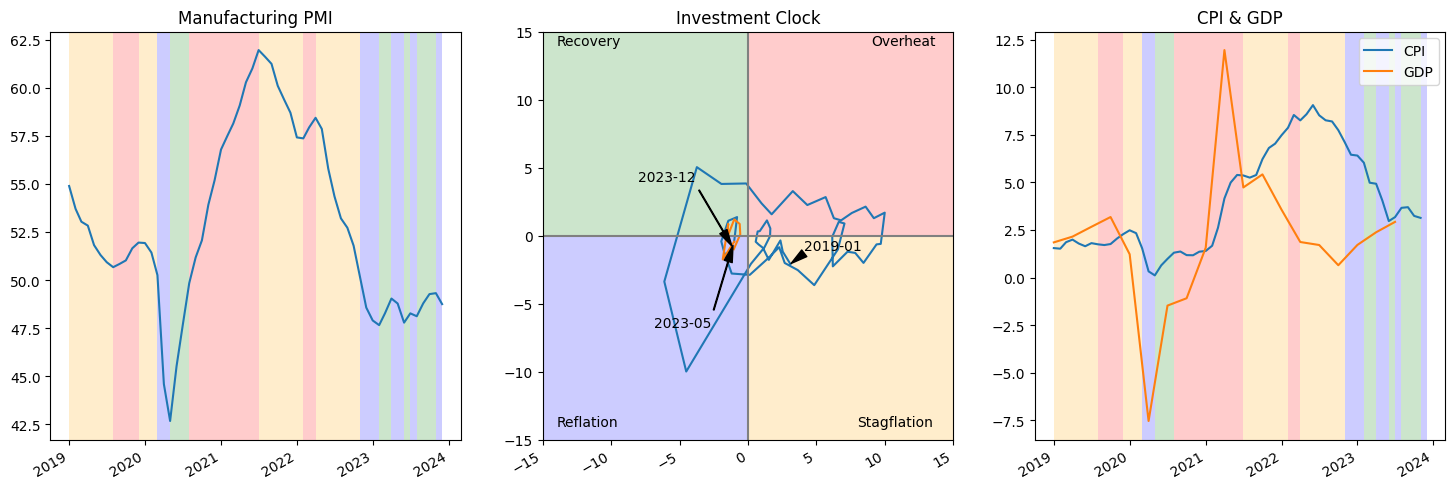

In [4]:
pmi = pd.read_csv('..\..\Data\Investing_PMI\Historic_Manufacturing_PMI.csv', parse_dates=True, index_col=0)
draw_investment_clock_with_indicators(pmi, base=50, title='Manufacturing PMI', 
                      cpi=cpi, gdp=gdp, country='United States',
                      start_date='2019-01')

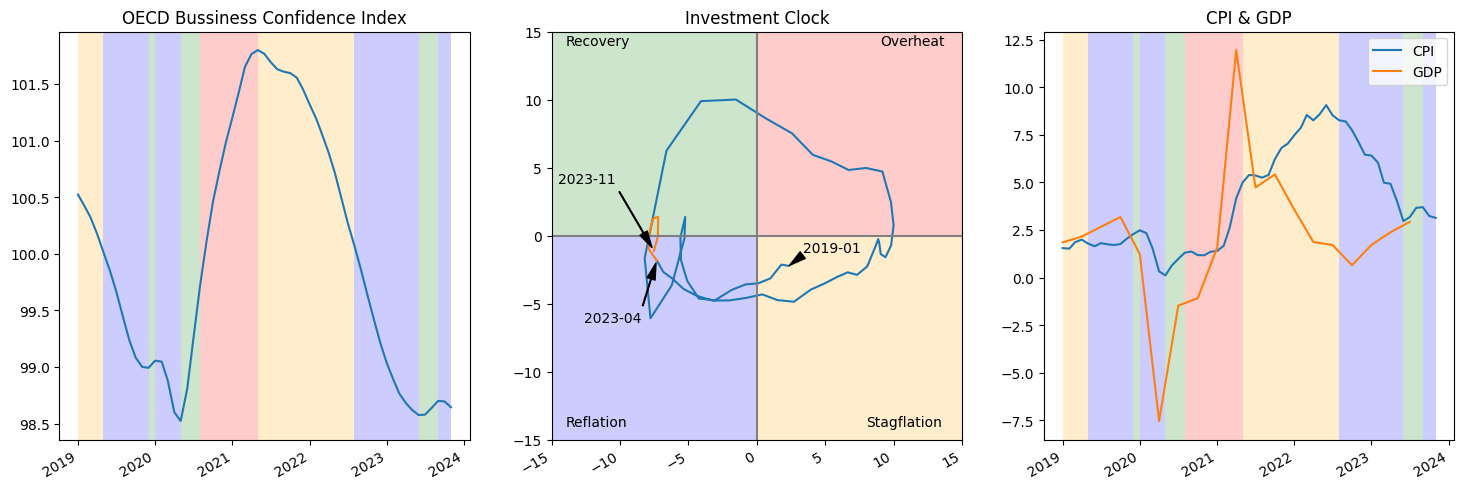

In [5]:
bci = pd.read_csv('..\..\Data\OECD_Stats\Indicators\OECD_Bussiness Confidence Indicator.csv', parse_dates=True, index_col=0)
draw_investment_clock_with_indicators(bci, base=100, title='OECD Bussiness Confidence Index', 
                      cpi=cpi, gdp=gdp, country='United States',
                      start_date='2019-01')

<img src="../Docs/InvestmentClock_byMerrillLyinch.png"  alt="drawing" width="600"/>

In [19]:
pmi['United States'].corr(bci['United States'])

0.8051995446299895

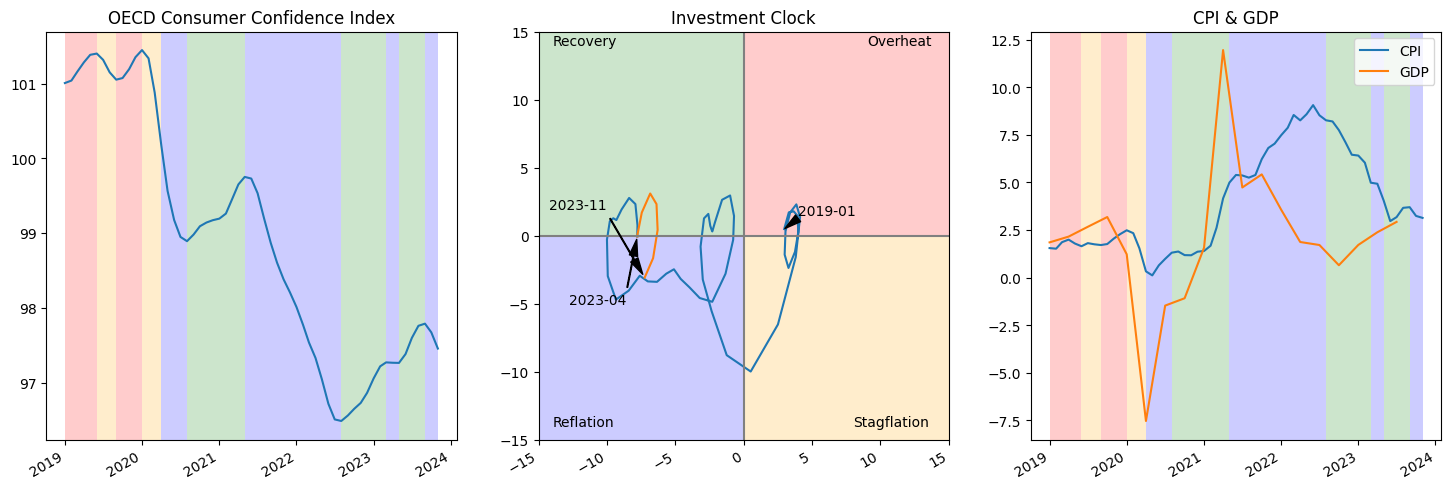

In [7]:
cci = pd.read_csv('..\..\Data\OECD_Stats\Indicators\OECD_Consumer Confidence Indicator.csv', parse_dates=True, index_col=0)
draw_investment_clock_with_indicators(cci, base=100, title='OECD Consumer Confidence Index', 
                      cpi=cpi, gdp=gdp, country='United States',
                      start_date='2019-01')

In [8]:
pmi['United States'].corr(cci['United States'])

0.14317161055324704

In [9]:
cpi['United States'].corr(cci['United States'])

-0.3136591174961891

## Investment clock for selected countries

In [10]:
bci_selected = bci[['United States', 'Eurozone', 'Japan', 'United Kingdom', 'China', 'India', 'Korea', 'Brazil']]
bci_selected.tail(10)

,United States,Eurozone,Japan,United Kingdom,China,India,Korea,Brazil
2023-02-01,98.6718,100.8405,100.3675,100.1054,99.4248,102.2062,98.0932,99.2644
2023-03-01,98.5840,100.6501,100.2946,99.8523,99.3551,NaN,98.1106,99.3837
2023-04-01,98.5580,100.3132,100.2955,99.5545,98.4786,NaN,98.2433,99.4292
2023-05-01,98.5280,99.9101,100.3414,99.4924,97.8148,NaN,98.3235,99.3743
2023-06-01,98.5096,99.5348,100.3963,99.7907,97.6402,NaN,98.3230,99.2930
2023-07-01,98.5856,99.2472,100.4375,100.1964,97.8052,NaN,98.2360,99.1370
2023-08-01,98.7252,99.1108,100.4669,100.1175,98.0820,NaN,98.1161,99.0078
2023-09-01,98.7960,99.1042,100.4915,100.0679,98.2602,NaN,98.0534,98.9484
2023-10-01,98.6911,99.1084,NaN,100.0084,98.2173,NaN,98.0738,98.9856
2023-11-01,98.5686,99.1001,NaN,99.4359,NaN,NaN,98.0914,99.1200


In [11]:
def draw_simple_investment_clock(index, base, ax2, country, start_date):
    index = index[country].loc[start_date:]
    # Using Exponential Moving Average to smooth out values
    index = index.ewm(com=1.5).mean().dropna()
        
    x = (index - base)[1:]
    xmax = x.abs().max()
    x = x * (10/xmax)
    
    y = index.diff().dropna()
    ymax = y.abs().max()
    y = y * (10/ymax)

    ax2.plot(x.iloc[:-7], y.iloc[:-7])
    ax2.plot(x.iloc[-8:], y.iloc[-8:])
    ax2.annotate(index.index[-1].strftime('%Y-%m'), 
                 xy=(x.iloc[-1], y.iloc[-1]), xytext=(x.iloc[-1]-7, y.iloc[-1]+5),
                 arrowprops=dict(facecolor='black', shrink=0.05, 
                                 width=0.5, headwidth=6))
    
    ax2.set_title(country)
    ax2.set_xlim(-15, 15)
    ax2.set_ylim(-15, 15)
    ax2.axhline(y=0, color='gray')
    ax2.axvline(x=0, color='gray')
    ax2.text(-14, 13, 'Recovery')
    ax2.text(8, 13, 'Overheat')
    ax2.text(7, -14, 'Stagflation')
    ax2.text(-14, -14, 'Reflation')

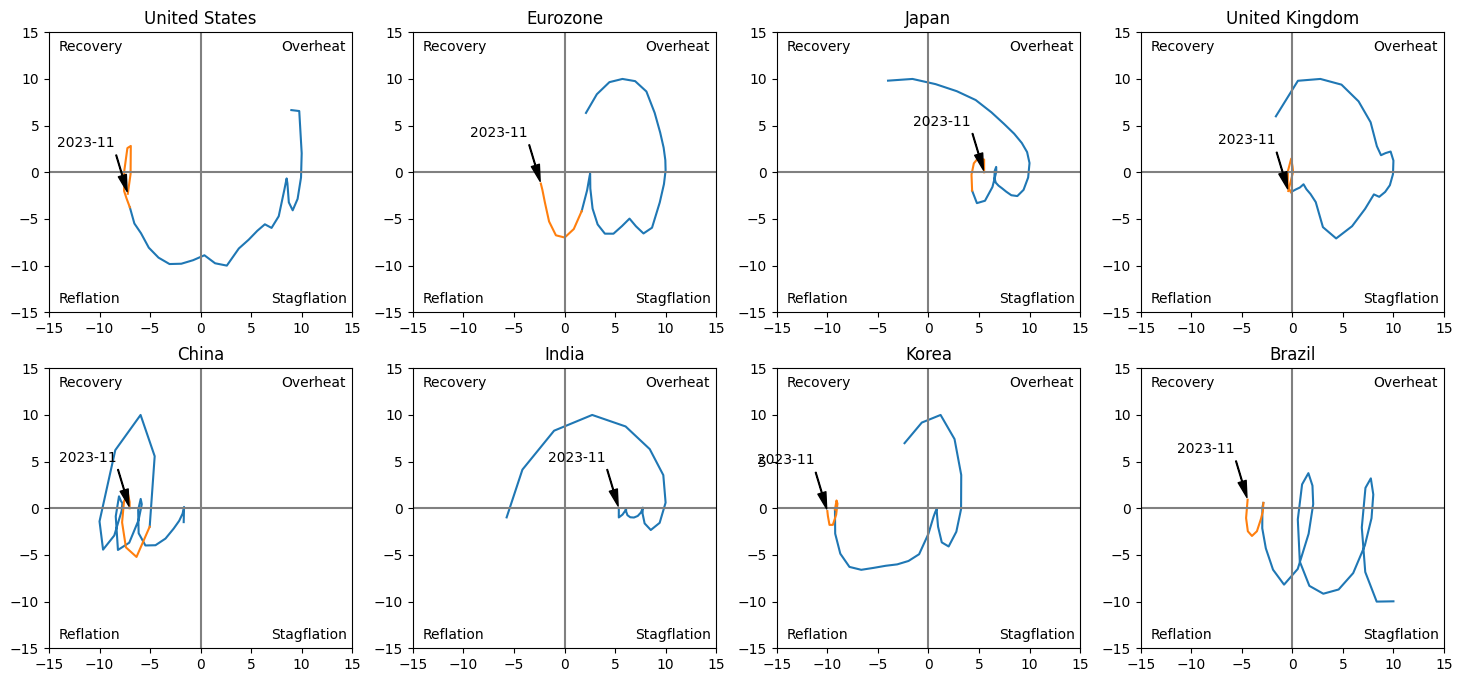

In [12]:
fig, ax = plt.subplots(2, 4, figsize=(18, 8))
start_date = '2021'

i = 0
j = 0
for country in bci_selected.columns:
    draw_simple_investment_clock(bci_selected, 100, ax[i,j], country, start_date)
    j += 1
    if j == 4:
        i += 1
        j = 0


In [13]:
pmi_selected = pmi[['United States', 'Eurozone', 'Japan', 'United Kingdom', 'China', 'India', 'Korea', 'Brazil']]
pmi_selected.tail(10)

,United States,Eurozone,Japan,United Kingdom,China,India,Korea,Brazil
2023-03-01,49.2,47.3,49.2,47.9,51.9,56.4,47.6,47.0
2023-04-01,50.2,45.8,49.5,47.8,49.2,57.2,48.1,44.3
2023-05-01,48.4,44.8,50.6,47.1,48.8,58.7,48.4,47.1
2023-06-01,46.3,43.4,49.8,46.5,49.0,57.8,47.8,46.6
2023-07-01,49.0,42.7,49.6,45.3,49.3,57.7,49.4,47.8
2023-08-01,47.9,43.5,49.6,43.0,49.7,58.6,48.9,50.1
2023-09-01,49.8,43.4,48.5,44.3,50.2,57.5,49.9,49.0
2023-10-01,50.0,43.1,48.7,44.8,49.5,55.5,49.8,48.6
2023-11-01,49.4,44.2,48.3,47.2,49.4,56.0,50.0,49.4
2023-12-01,47.9,44.4,47.9,46.2,49.0,54.9,49.9,48.4


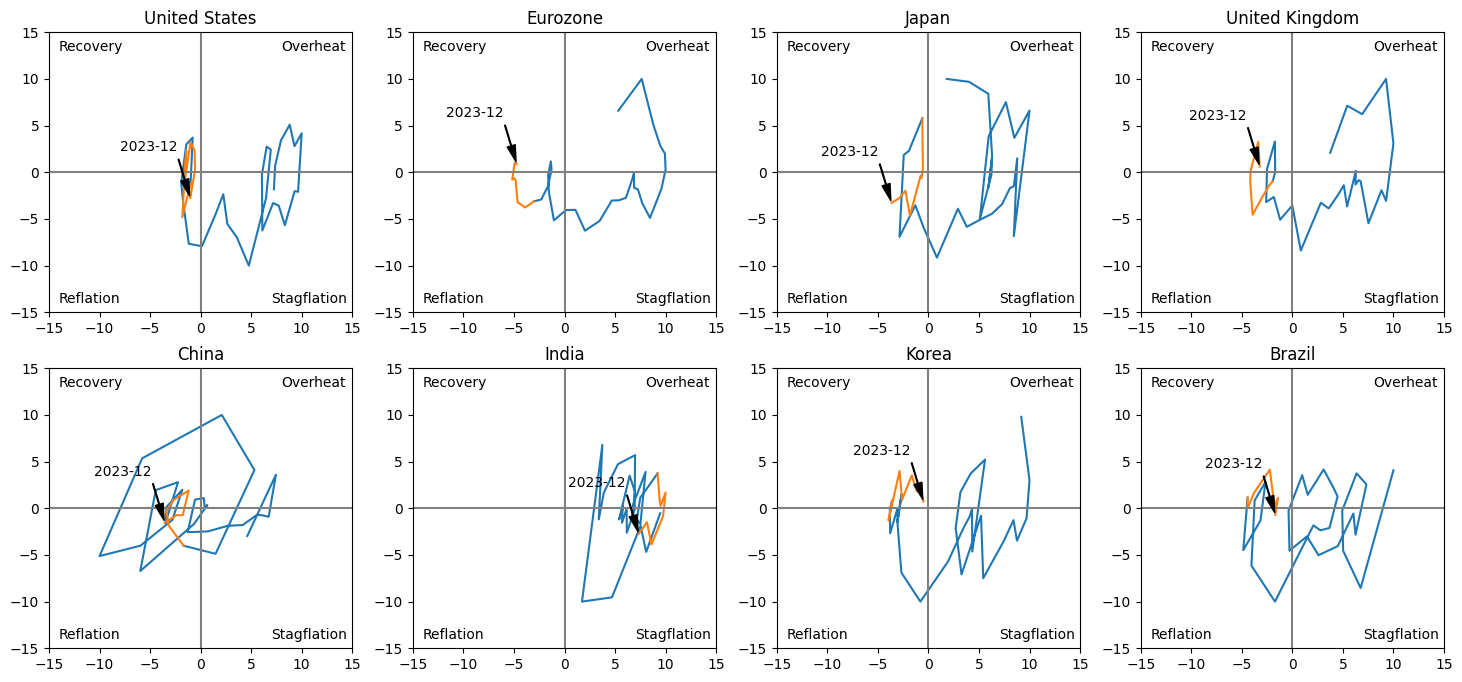

In [14]:
fig, ax = plt.subplots(2, 4, figsize=(18, 8))
start_date = '2021'

i = 0
j = 0
for country in pmi_selected.columns:
    draw_simple_investment_clock(pmi_selected, 50, ax[i,j], country, start_date)
    j += 1
    if j == 4:
        i += 1
        j = 0

## Indicators from Fidelity to try to incorporate into investment clock

- Economic activity (GDP, Industrial Production, Employment, Incomes)
- Credit, Customer Credit?
- Profits
- Interest Rates
- Inventories and Sales

<img src="../../Docs/BussinessCycles_Fidelity.png"  alt="drawing" width="1000"/>